## Feature Engineering

In [229]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [230]:
# Load data

loan_df = pd.read_csv(r'C:\Users\Joseph\OneDrive\Documents\CFI\Loan Default Prediction With Machine Learning\data\new_data\data\vehicle_loans_eda_1.csv', index_col='UNIQUEID')

In [231]:
# inspect the head

loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,45,Salaried,6,1,0,0,0,...,0,0,0,0,0,0,0,34,0,0
537409,47145,65550,73.23,45,Self employed,6,1,0,0,0,...,0,1991,0,0,1,0,1,33,23,23
417566,53278,61360,89.63,45,Self employed,6,1,0,0,0,...,0,0,0,0,0,0,0,32,0,0
624493,57513,66113,88.48,45,Self employed,6,1,0,0,0,...,0,31,0,0,0,1,1,24,8,15
539055,52378,60300,88.39,45,Self employed,6,1,0,0,0,...,0,0,0,0,0,1,1,41,0,0


Let's bring in the explore_categorical and explore_continuous functions we created in the EDA

In [232]:
def explore_categorical(col_name):   
    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(loan_df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(loan_df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    sns.catplot(data=loan_df,kind='count',x=col_name,hue='LOAN_DEFAULT')
    plt.show()

In [233]:
def explore_continuous(col_name):
    #print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(loan_df[col_name].describe())
    print("\n")

    #Look at boxplot
    sns.boxplot(x=col_name, data=loan_df)
    plt.show()

    #Look at the distribution
    sns.distplot(loan_df[col_name], hist=False)
    plt.show()

    #Now lets look deeper by grouping with the target variable 
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(loan_df.groupby('LOAN_DEFAULT')[col_name].describe())

    #look at grouped boxplot 
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=loan_df, orient="h")
    plt.show()

In EDA, I observed that disbursed amount had some extremely large values. Let's have a closer look.

DISBURSED_AMOUNT Summary


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




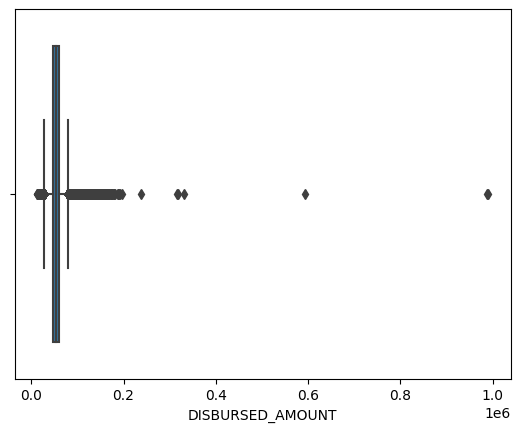

C:\Users\Joseph\AppData\Local\Temp\ipykernel_16700\115762789.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df[col_name], hist=False)


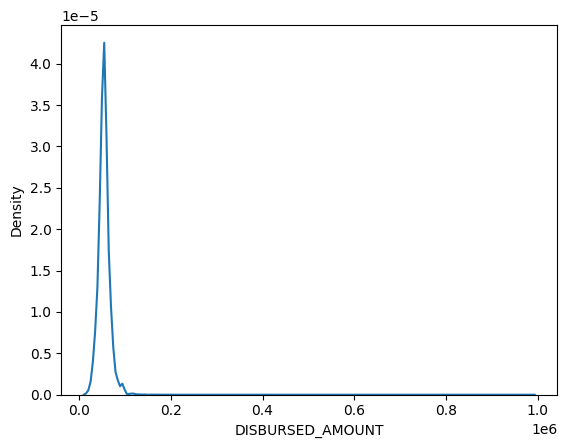

DISBURSED_AMOUNT Grouped Summary


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


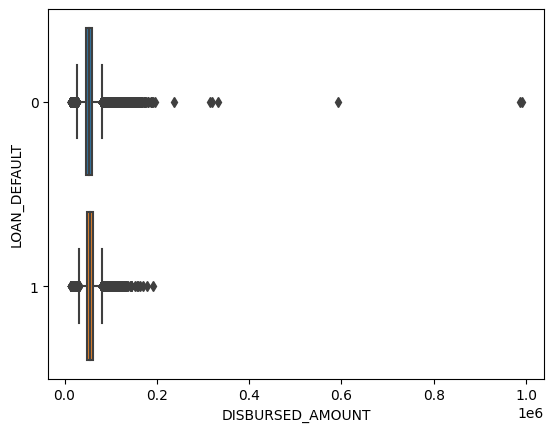

In [234]:
# Closer look at DISBUSED_AMOUNT

explore_continuous('DISBURSED_AMOUNT')

The largest value here is 990,572. This is considerably larger than the next largest value which is also an extreme outlier.

Is it possible that this could be an error in the data?

- If I assume that the disbursal amount is stored in Indian rupees, then 990,572 equates to $13,400
- It's a lot of money but not impossible for a car loan

Let'x examine the row data, LTV and ASSET_COST to get an idea about whether or not this is a valid piece of data.

In [235]:
loan_df.loc[loan_df['DISBURSED_AMOUNT'].idxmax()]

DISBURSED_AMOUNT                                                                  990572
ASSET_COST                                                                       1628992
LTV                                                                                61.39
MANUFACTURER_ID                                                                      152
EMPLOYMENT_TYPE                                                                  Missing
STATE_ID                                                                               9
AADHAR_FLAG                                                                            1
PAN_FLAG                                                                               1
VOTERID_FLAG                                                                           0
DRIVING_FLAG                                                                           0
PASSPORT_FLAG                                                                          0
PERFORM_CNS_SCORE    

Ok, it seems reasonable that the applicant borrowed 990,572 to pay for a car that cost 1,628,992. Let's assume a legitimate value that I want to include in my model.

One way to keep extreme values without them skewing the data is through binning. Let's create some bins based on the disbursed amount.

In [236]:
disbursed_buckets = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
disbursed_labels = ['13k-30k','30k-45k','45k-60k','60k-75k','75k-150k','150k-1m']

Now, I'll use these bins to categorize the rows based on their disbursed amounts.

In [237]:
loan_df['DISBURSED_CAT'] = pd.cut(loan_df['DISBURSED_AMOUNT'], disbursed_buckets, labels=disbursed_labels)

DISBURSED_CAT Summary


DISBURSED_CAT Counts
45k-60k     126904
60k-75k      49824
30k-45k      40626
75k-150k     10871
13k-30k       4865
150k-1m         64
Name: DISBURSED_CAT, dtype: int64


DISBURSED_CAT Ratio
45k-60k     0.544293
60k-75k     0.213696
30k-45k     0.174245
75k-150k    0.046626
13k-30k     0.020866
150k-1m     0.000274
Name: DISBURSED_CAT, dtype: float64


DISBURSED_CAT Default Counts
LOAN_DEFAULT       0      1
DISBURSED_CAT              
13k-30k         4207    658
30k-45k        34323   6303
45k-60k        98830  28074
60k-75k        37056  12768
75k-150k        8070   2801
150k-1m           57      7


DISBURSED_CAT Default Ratio
LOAN_DEFAULT          0         1
DISBURSED_CAT                    
13k-30k        0.864748  0.135252
30k-45k        0.844853  0.155147
45k-60k        0.778778  0.221222
60k-75k        0.743738  0.256262
75k-150k       0.742342  0.257658
150k-1m        0.890625  0.109375




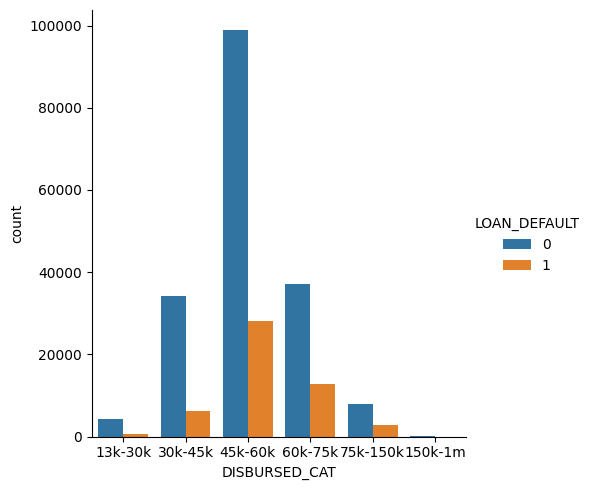

In [238]:
explore_categorical('DISBURSED_CAT')

The vast majority of loans fall in the '45K - 60K bucket. Also, the higher the loan amount, the more likely it was to default except for loans in the very largest category.

Now, let's create a new feature "DISBURSAL_DIFFERENCE" column from the difference between the "ASSET_COST" and "DISBURSED_AMOUNT"

In [239]:
# create new column DISBURSAL_DIFFERENCE

loan_df['DISBURSAL_DIFFERENCE'] = loan_df['ASSET_COST'] - loan_df['DISBURSED_AMOUNT']

In [240]:
# Inspect the new column (DISBURSAL_DIFFERENCE)

loan_df[['DISBURSAL_DIFFERENCE', 'ASSET_COST', 'DISBURSED_AMOUNT']].sample(5)

,DISBURSAL_DIFFERENCE,ASSET_COST,DISBURSED_AMOUNT
UNIQUEID,,,
486050,22942,42400,19458
631187,31677,101800,70123
542062,74450,170349,95899
625151,27838,68732,40894
447807,15731,84900,69169


### Primary and secondary accounts engineering

The loan data contains 14 columns providing information about any existing loans a customer may have. This data is split according to primary and secondary accounts. A primary account is a loan where the customer is the sole recipient of the disbursal. A secondary account is a one where the customer is a co-applicant or guarantor for the loan.

- PRI_NO_OF_ACCTS: count of total loans taken by the customer at the time of disbursement  
- PRI_ACTIVE_ACCTS: count of active loans taken by the customer at the time of disbursement
- PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement    
- PRI_CURRENT_BALANCE: total Principal outstanding amount of the active loans at the time of disbursement        
- PRI_SANCTIONED_AMOUNT: total amount that was sanctioned for all the loans at the time of disbursement  
- PRI_DISBURSED_AMOUNT: total amount that was disbursed for all the loans at the time of disbursement
- PRIMARY_INSTAL_AMT: EMI Amount of the primary loan
- SEC_NO_OF_ACCTS: count of secondary total loans taken by the customer at the time of disbursement 
- SEC_ACTIVE_ACCTS: count of secondary active loans taken by the customer at the time of disbursement 
- SEC_OVERDUE_ACCTS: count of secondary accounts at the time of disbursement    
- SEC_CURRENT_BALANCE: total Principal outstanding amount of the secondary active loans at the time of disbursement 
- SEC_SANCTIONED_AMOUNT: total amount that was sanctioned for all the secondary loans at the time of disbursement  
- SEC_DISBURSED_AMOUNT: total amount that was disbursed for all the secondary loans at the time of disbursement
- SEC_INSTAL_AMT: EMI Amount of the secondary loan 

Let's combine these accounts to reduce the complexity of our data without losing information.

I'll create a column "TOTAL_ACCOUNTS" to store the combined total of primary and secondary accounts.

In [241]:
# create a new column TOTAL_ACCOUNTS

loan_df['TOTAL_ACCTS'] = loan_df['PRI_NO_OF_ACCTS'] + loan_df['SEC_NO_OF_ACCTS']

In [242]:
# let's take a look at the result

loan_df[['TOTAL_ACCTS', 'PRI_NO_OF_ACCTS', 'SEC_NO_OF_ACCTS']].sample(10)

,TOTAL_ACCTS,PRI_NO_OF_ACCTS,SEC_NO_OF_ACCTS
UNIQUEID,,,
503673,0,0,0
433454,0,0,0
597976,1,1,0
517681,0,0,0
573077,0,0,0
588397,1,1,0
517888,0,0,0
459938,0,0,0
436163,0,0,0


Ok let's now use the above example to create TOTAL_account_columns from the remaining primary/secondary variables

In [243]:
loan_df['TOTAL_ACTIVE_ACCTS'] = loan_df['PRI_ACTIVE_ACCTS'] + loan_df['SEC_ACTIVE_ACCTS']
loan_df['TOTAL_OVERDUE_ACCTS'] = loan_df['PRI_OVERDUE_ACCTS'] + loan_df['SEC_OVERDUE_ACCTS']
loan_df['TOTAL_CURRENT_BALANCE'] = loan_df['PRI_CURRENT_BALANCE'] + loan_df['SEC_CURRENT_BALANCE']
loan_df['TOTAL_SANCTIONED_AMOUNT'] = loan_df['PRI_SANCTIONED_AMOUNT'] + loan_df['SEC_SANCTIONED_AMOUNT'] 
loan_df['TOTAL_DISBURSED_AMOUNT'] = loan_df['PRI_DISBURSED_AMOUNT'] + loan_df['SEC_DISBURSED_AMOUNT']
loan_df['TOTAL_INSTAL_AMT'] = loan_df['PRIMARY_INSTAL_AMT'] + loan_df['SEC_INSTAL_AMT']

Now, I'll drop the ones I no longer need.

In [244]:
drop_cols = ['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT']

loan_df = loan_df.drop(drop_cols, axis=1)

I'm also interested in calculating the percentage of overdue accounts a person has and store the result as the percentage of overdue accounts.

In [245]:
# create a column 'OVERDUE_PCT'

loan_df['OVERDUE_PCT'] = loan_df['TOTAL_OVERDUE_ACCTS'] / loan_df['TOTAL_ACCTS']

In [246]:
# let's check if there is any missing values

loan_df['OVERDUE_PCT'].isnull().sum()

115792

I have a lot of missing values. I'll fill them with 0s.

In [247]:
loan_df['OVERDUE_PCT'] = loan_df['OVERDUE_PCT'].fillna(0)

In [248]:
# let's verify we no longer have missing values

loan_df['OVERDUE_PCT'].isnull().sum()

0

Great, the OVERDUE_PCT column no longer has any missing values.

In [249]:
# let's check the information we now have

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   DISBURSED_AMOUNT                     233154 non-null  int64   
 1   ASSET_COST                           233154 non-null  int64   
 2   LTV                                  233154 non-null  float64 
 3   MANUFACTURER_ID                      233154 non-null  int64   
 4   EMPLOYMENT_TYPE                      233154 non-null  object  
 5   STATE_ID                             233154 non-null  int64   
 6   AADHAR_FLAG                          233154 non-null  int64   
 7   PAN_FLAG                             233154 non-null  int64   
 8   VOTERID_FLAG                         233154 non-null  int64   
 9   DRIVING_FLAG                         233154 non-null  int64   
 10  PASSPORT_FLAG                        233154 non-null  int64   


Nice, I have reduced my number of columns to 30, and added the OVERDUE_PCT column.

### Scaling

I'll use min max scaling to bring my continuous variables into the same range. I noticed that the data have larger outliers.

In [250]:
# let's create a list of continuous columns

numeric_cols = ['DISBURSED_AMOUNT', 
                'ASSET_COST', 
                'LTV', 
                'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
                'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                'NO_OF_INQUIRIES', 
                'AGE', 
                'AVERAGE_ACCT_AGE_MONTHS', 
                'CREDIT_HISTORY_LENGTH_MONTHS',
                'PERFORM_CNS_SCORE',
                'TOTAL_ACCTS',
                'TOTAL_ACTIVE_ACCTS',
                'TOTAL_OVERDUE_ACCTS',
                'TOTAL_CURRENT_BALANCE', 
                'TOTAL_SANCTIONED_AMOUNT', 
                'TOTAL_DISBURSED_AMOUNT', 
                'TOTAL_INSTAL_AMT', 
                'OVERDUE_PCT', 
                'DISBURSAL_DIFFERENCE']

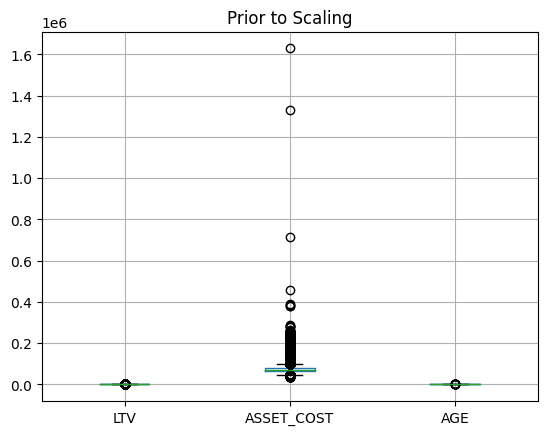

In [251]:
# plot numeric_cols

loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('Prior to Scaling')
plt.show()

The numeric values are distributed across very different scales. Let's fix this problem using Min Max Scaling.

In [252]:
mm_scaler = MinMaxScaler()

In [253]:
loan_df[numeric_cols] = mm_scaler.fit_transform(loan_df[numeric_cols])

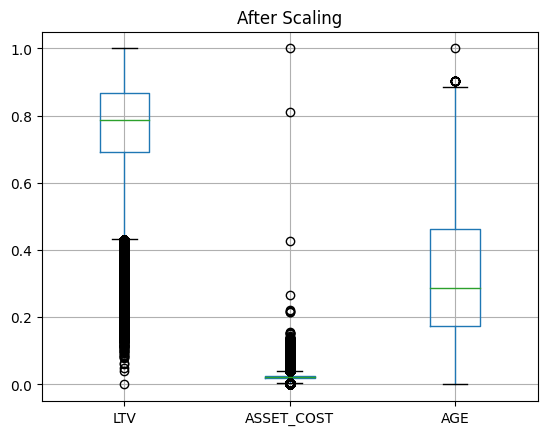

In [254]:
loan_df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('After Scaling')
plt.show()

Now, all the values are ranged between 1 and 0

In [255]:
#save cleaned data

loan_df.to_csv(r'C:\Users\Joseph\OneDrive\Documents\CFI\Loan Default Prediction With Machine Learning\data\new_data\data\vehicle_loans_feat_1.csv')